In [1]:
import numpy as np
import pandas as pd

#for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#stats
import statsmodels.formula.api as sm

from sklearn.metrics import r2_score

In [2]:
#loading data
data = pd.read_csv("Advertising.csv",index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(f"Shape of data is: {data.shape}")
print(f"name of columns of data are: {data.columns}")

Shape of data is: (200, 4)
name of columns of data are: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


What are the observations?

Each observation represents one market (200 markets in the dataset)
What are the features?

TV: advertising dollars spent on TV for a single product (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing the Data

##### use scatter plot to visualize relationship between features and response 

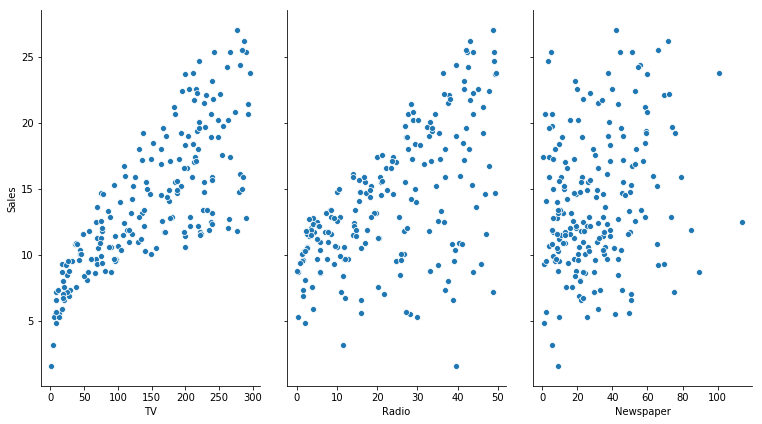

In [5]:
#scatter plot in seaborn
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",height=6,aspect=0.6)

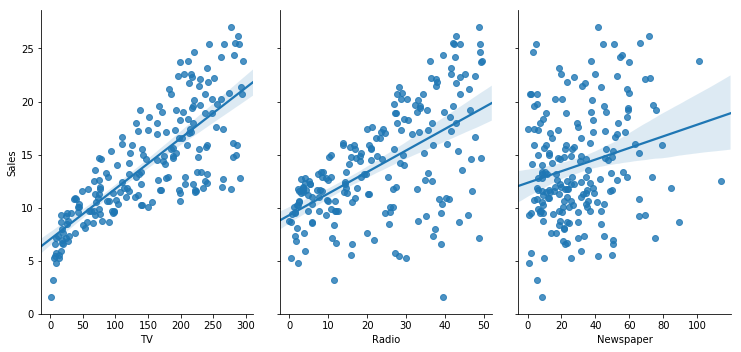

In [6]:
#include regression line
sns.pairplot(data,x_vars=["TV", "Radio", "Newspaper"],y_vars="Sales",height=5,aspect=0.7,kind="reg")


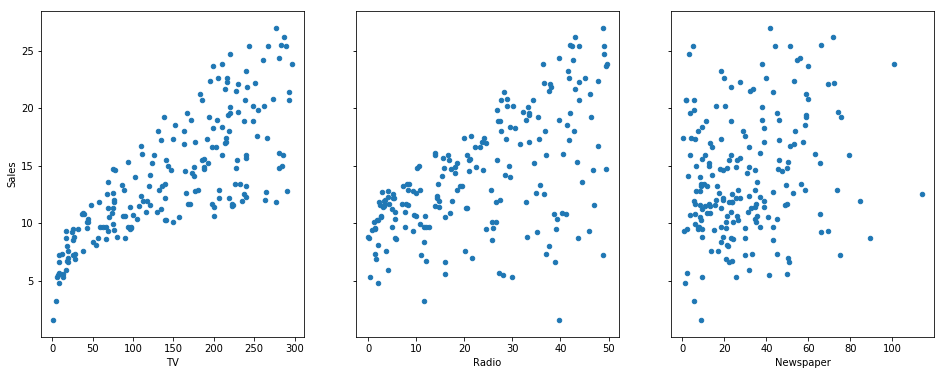

In [7]:
#scatter plot in pandas
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x="TV",y="Sales",ax=axs[0],figsize=(16,6))
data.plot(kind="scatter",x="Radio",y="Sales",ax=axs[1])
data.plot(kind="scatter",x="Newspaper",y="Sales",ax=axs[2])

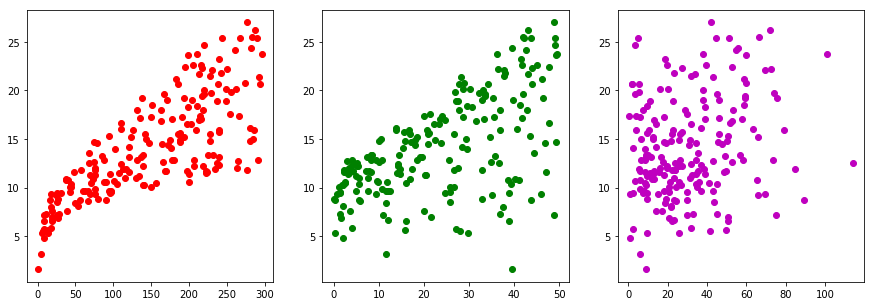

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter("TV","Sales",c="r", data=data)


plt.subplot(1,3,2)
plt.scatter("Radio","Sales", c="g" ,data=data)

plt.subplot(1,3,3)
plt.scatter("Newspaper","Sales",c="m",data=data)

##### use scatter matrix to visualize relationship between all numerical variables

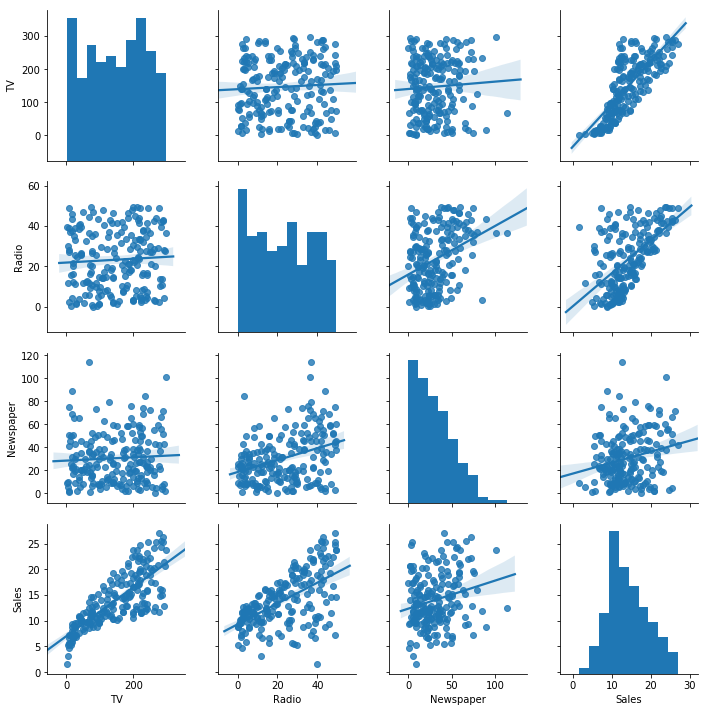

In [9]:
#scatter matrix in seaborns
sns.pairplot(data,kind="reg")

##### use a correlation matrix to visualize correlation between all numerical variables

In [10]:
#compute correlation matrix
#corr value range -1 to +1
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [11]:
data["TV"].corr(data["Sales"])

0.7822244248616061

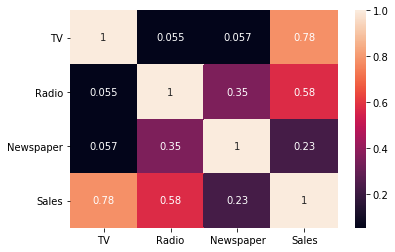

In [12]:
#display aa correlation matrix in seaborn using heatmap
sns.heatmap(data.corr(),annot=True)

# Linear Regression

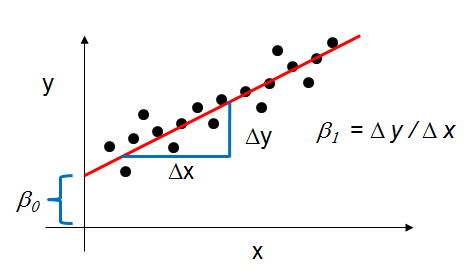

In [13]:
####statsmodel###

#create a fitted model
lm = sm.ols(formula="Sales ~ TV",data=data).fit()

In [14]:
#print the coefficents 
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [67]:
### scikit-learn ###

#create x and y
feature_col = ["TV"]
x = data[feature_col]
y = data.Sales.values



#initiate and fit 
LR = LinearRegression()
print(LR.fit(x,y))

#print yhe coefficients
print(LR.coef_)
print(LR.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.04753664]
7.032593549127693


# using the model for prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$$$y = 7.0326 + 0.0475 \times 50$$

In [68]:
#manually calculate the prediction
y = 7.03259 + 0.0475 * 50
y

9.407589999999999

In [69]:
y = LR.intercept_ + LR.coef_*50
y

array([9.40942557])

In [70]:
### statsmodels ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
x_new = pd.DataFrame({"TV":[50]})

#predict for new observation
lm.predict(x_new)

0    9.409426
dtype: float64

In [71]:
### scikit-learn ###
#predict for new observation
LR.predict(np.array([50]).reshape(1,1))



array([9.40942557])

In [72]:
#predict for new observation
LR.predict([[125]])

array([12.9746736])

# p-values

In [73]:
lm.pvalues #(less than 0.05 so is statistically significant feature)

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

# how well does the model fit the data

In [74]:
## statsmodels ##
lm.rsquared

0.611875050850071

In [134]:
## scikit-learn ##
#y_predict = LR.predict(x)
#r2_score(y,y_predict)
#LR.score(y,y_predict)

# multiple linear regression

In [86]:
#create x and y
 
feature_cols = ["TV", "Radio", "Newspaper"]
x = data[feature_cols]
y = data.Sales

#initialize and fit 
MLR = LinearRegression()
print(MLR.fit(x,y))

print(MLR.coef_)
print(MLR.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594067


In [94]:
for i in(feature_cols,MLR.coef_):
    print(i)


['TV', 'Radio', 'Newspaper']
[ 0.04576465  0.18853002 -0.00103749]


# feature selection

##### using p-values
We could try a model with all features, and only keep features in the model if they have small p-values:

In [101]:
lm = sm.ols(formula='Sales ~ TV + Radio + Newspaper',data=data).fit()

In [102]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [103]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

This indicates we would reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper. Thus, we would keep TV and Radio in the model.

However, this approach has drawbacks:

Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), p-values are less reliable.
Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant.

##### using R-squared

We could try models with different sets of features, and compare their R-squared values:

In [106]:
lm = sm.ols(formula="Sales ~ TV + Radio",data=data).fit()
lm.rsquared

0.8971942610828957

In [107]:
lm = sm.ols('Sales ~ TV+Radio+Newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

This would seem to indicate that the best model includes all three features. Is that right?

R-squared will always increase as you add more features to the model, even if they are unrelated to the response.
As such, using R-squared as a model evaluation metric can lead to overfitting.
Adjusted R-squared is an alternative that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.
As well, R-squared depends on the same assumptions as p-values, and it's less reliable if those assumptions are violated

##### using train_test_split for feature selection

Let's use train/test split with RMSE to decide whether Newspaper should be kept in the model:

In [129]:
def train_test_rmse(X,y): 
    train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)
    MLR.fit(train_X,train_y)
    y_predict = MLR.predict(test_X)
    return np.sqrt(mean_squared_error(test_y,y_predict))

In [130]:
#include Newspaper
feature_cols = ["TV","Radio",'Newspaper']
X = data[feature_cols]
train_test_rmse(X,y)

2.098122563495681

In [131]:
#exclude Newspaper
feature_cols = ["TV","Radio"]
X = data[feature_cols]
train_test_rmse(X,y)

2.0955738506628405

Comparing linear regression with other models
Advantages of linear regression:

Simple to explain
Highly interpretable
Model training and prediction are fast
No tuning is required (excluding regularization)
Features don't need scaling
Can perform well with a small number of observations
Disadvantages of linear regression:

Presumes a linear relationship between the features and the response
Performance is (generally) not competitive with the best supervised learning methods due to high bias
Sensitive to irrelevant features
Can't automatically learn feature interactions